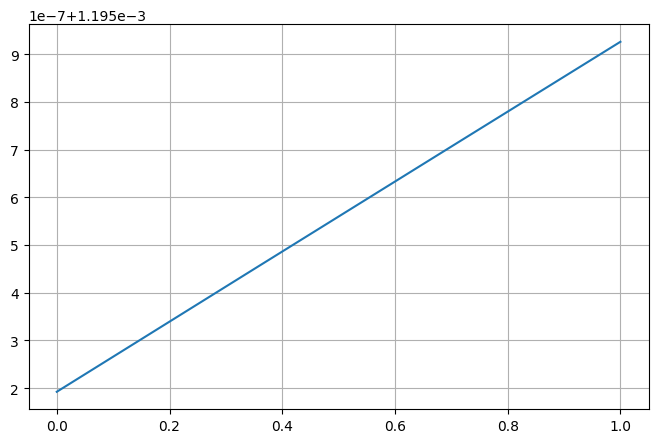

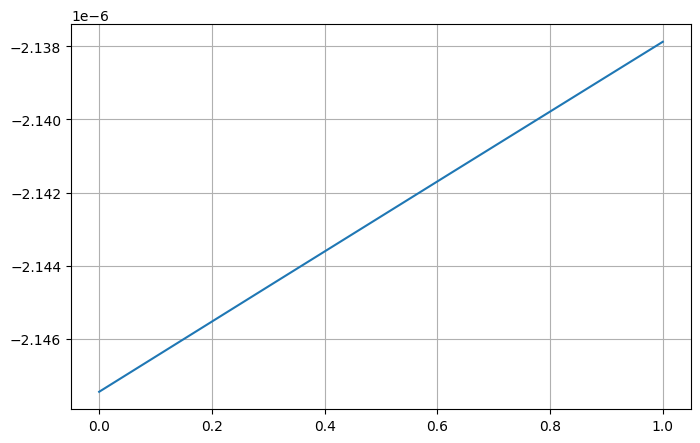

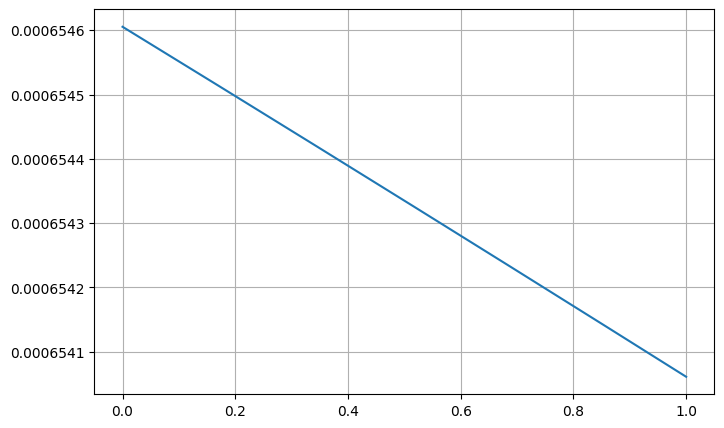

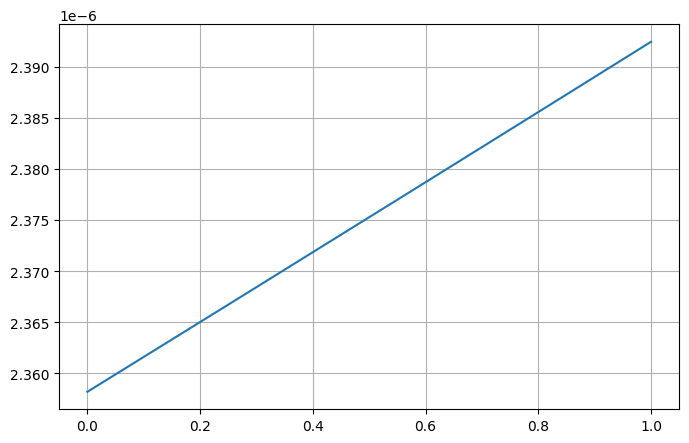

In [37]:
import numpy as np
import matplotlib.pyplot as plt

k0 = 2 * np.pi * 1e4 / 3  # The frequency is 1THz.
n1 = 3.46
n2 = 10.0
n3 = 1.0
d0 = 1e-8
a = 7.29735e-3
sigma_xy_b = -0.5
sigma_xy_t = 0.5
mu = 1e-3
theta_0 = np.pi / 4
s3 = np.sin(theta_0)
c3 = np.cos(theta_0)
c2 = np.sqrt(n2**2 - n3**2 * s3**2) / n2
c1 = np.sqrt(n1**2 - n3**2 * s3**2) / n1
E1x = 1
E1y = mu * c1 * E1x

gamma_range = np.linspace(0, 1, 1000)
theta_F_real_list = []
theta_F_imag_list = []
theta_K_real_list = []
theta_K_imag_list = []

for gamma in gamma_range:   
    sigma_xx_b = -gamma * sigma_xy_b
    sigma_xx_t = gamma * sigma_xy_t
    beta = np.exp(1j * n2 * k0 * d0 * c2)
    
    A = np.zeros((8, 8), dtype=complex)
    b = np.zeros(8, dtype=complex)

    A[0, 0] = 1
    A[0, 2] = -1
    A[0, 4] = -1
    b[0] = -E1x

    A[1, 1] = 1
    A[1, 3] = -1
    A[1, 5] = -1
    b[1] = -E1y

    A[2, 2] = beta
    A[2, 4] = np.conj(beta)
    A[2, 6] = -1
    b[2] = 0

    A[3, 3] = beta
    A[3, 5] = np.conj(beta)
    A[3, 7] = -1
    b[3] = 0

    A[4, 0] = -2 * a * sigma_xy_b
    A[4, 1] = 2 * a * sigma_xx_b + n1 / c1
    A[4, 3] = n2 / c2
    A[4, 5] = -n2 / c2
    b[4] = 2 * a * sigma_xy_b * E1x + (n1 / c1 - 2 * a * sigma_xx_b) * E1y

    A[5, 3] = -n2 * beta / c2
    A[5, 5] = n2 * np.conj(beta) / c2
    A[5, 6] = -2 * a * sigma_xy_t
    A[5, 7] = 2 * a * sigma_xx_t + 1 / c3
    b[5] = 0

    A[6, 0] = -n1 * c1 - 2 * a * sigma_xx_b
    A[6, 1] = -2 * a * sigma_xy_b
    A[6, 2] = -n2 * c2
    A[6, 4] = n2 * c2
    b[6] = (2 * a * sigma_xx_b - n1 * c1) * E1x + 2 * a * sigma_xy_b * E1y

    A[7, 2] = n2 * beta * c2
    A[7, 4] = -n2 * np.conj(beta) * c2
    A[7, 6] = -c3 - 2 * a * sigma_xx_t
    A[7, 7] = -2 * a * sigma_xy_t
    b[7] = 0

    x = np.linalg.solve(A, b)
    E2x, E2y, E3x, E3y, E4x, E4y, E5x, E5y = x

    theta_F = np.arctan(E5y / (E5x * c3))
    theta_K = np.arctan(E2y / (E2x * c1))
    theta_F_real_list.append(theta_F.real)
    theta_F_imag_list.append(theta_F.imag)
    theta_K_real_list.append(theta_K.real)
    theta_K_imag_list.append(theta_K.imag)

plt.figure(figsize=(8, 5))
plt.grid(True)
plt.plot(gamma_range, theta_F_real_list, label=r'$\Re\theta_F$ vs sigma ratio')

plt.figure(figsize=(8, 5))
plt.grid(True)
plt.plot(gamma_range, theta_F_imag_list, label=r'$\Im\theta_F$ vs sigma ratio')

plt.figure(figsize=(8, 5))
plt.grid(True)
plt.plot(gamma_range, theta_K_real_list, label=r'$\Re\theta_K$ vs sigma ratio')

plt.figure(figsize=(8, 5))
plt.grid(True)
plt.plot(gamma_range, theta_K_imag_list, label=r'$\Im\theta_K$ vs sigma ratio')


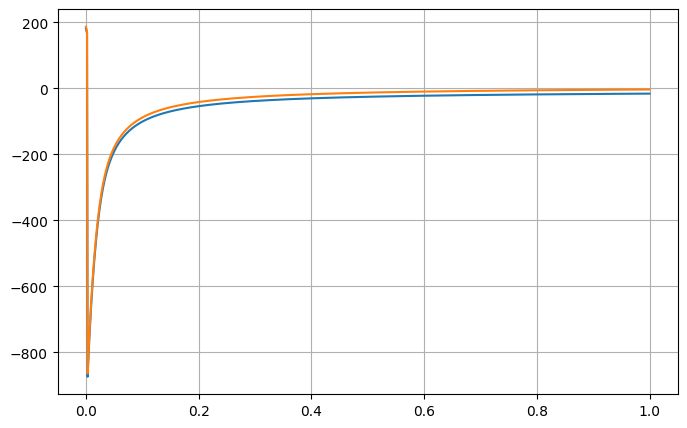

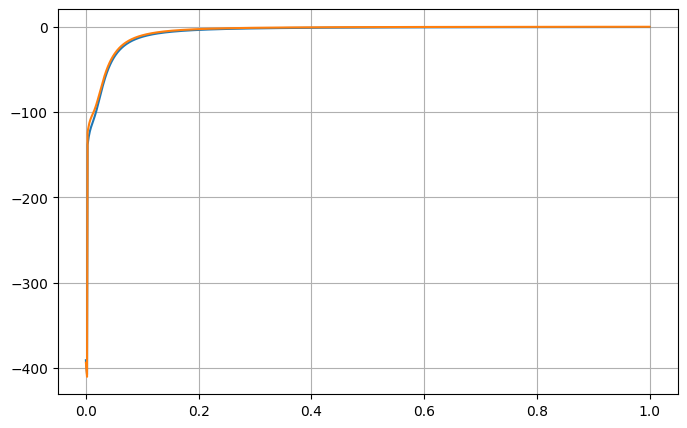

In [36]:
# 45 degree incident taken as an example. Q1 and Q2 represent the charge accumulation on bottom and top surface, respectively.
e0 = 8.854e-12
alpha = np.cos(n2 * k0 * d0 * c2)
beta = np.sin(n2 * k0 * d0 * c2)

Q1_real_list = []
Q1_imag_list = []
Q2_real_list = []
Q2_imag_list = []

for i in range(1000):
    mu1 = -gamma_range[i]
    mu2 = gamma_range[i]
    tf = theta_F_real_list[i] + 1j * theta_F_imag_list[i]
    tk = theta_K_real_list[i] + 1j * theta_K_imag_list[i]
    a1 = -n2 * mu * c1 * alpha - 1j * mu * n1 * c2 * beta
    b1 = -n2 * tk * c1 * alpha + 1j * n1 * c2 * tk * beta
    d1 = n2 * tf * c3
    a2 = n2 * c2**2 * alpha + 1j * n1 * c1 * c2 * beta
    b2 = n2 * c2**2 * alpha - 1j * n1 * c1 * c2 * beta
    d2 = -n2 * c2**2
    a3 = 1 - mu1 * mu * c1
    b3 = 1 - mu1 * tk * c1
    a4 = mu1 + mu * c1
    b4 = mu1 + tk * c1
    a = a1 * a4 - a2 * a3
    b = b2 * b3 - b1 * b4
    c = a2 * b3 + b2 * a3 - a1 * b4 - b1 * a4
    d = d2 * a3 - d1 * a4
    e = d2 * b3 - d1 * b4
    denom = (n2 * tf * c3 * (mu2 + tf * c3) - n2 * c2**2 * (mu2 * tf * c3 - 1)) * alpha + 1j * (c2 * c3 * (mu2 * tf * c3 - 1) - c2 * tf * (mu2 + tf * c3)) * beta
    h = n2 * mu * c1 * (mu2 + tf * c3) - n2 * c2**2 * (mu2 * tf * c3 - 1)
    i = n2 * tk * c1 * (mu2 + tf * c3) - n2 * c2**2 * (mu2 * tf * c3 - 1)
    f = h / denom
    g = i / denom
    
    E_2s_1 = (-(c + d * g + e * f) + np.sqrt((c + d * g + e * f)**2 - 4 * (b + e * g) * (d * f - a))) / (2 * (b + e * g))
    E_5s_1 = f + g * E_2s_1
    Q1_1 = n1 * s3 * (mu - tk * E_2s_1) + 1j * (n2 * s3 * (tf * c3 * E_5s_1 - alpha * c1 * (mu + tk * E_2s_1))) / (c2 * beta)
    Q2_1 = -s3 * tf * E_5s_1 + 1j * (n2 * s3 * (c1 * (mu + tk * E_2s_1) - alpha * c3 * tf * E_5s_1)) / (c2 * beta)
    sigma_xy_b_1 = -3e8 * e0 * Q1_1 / (s3 * (1 + E_2s_1))
    sigma_xy_t_1 = -3e8 * e0 * Q2_1 / (s3 * E_5s_1)

    E_2s_2 = (-(c + d * g + e * f) - np.sqrt((c + d * g + e * f)**2 - 4 * (b + e * g) * (d * f - a))) / (2 * (b + e * g))
    E_5s_2 = f + g * E_2s_2
    Q1_2 = n1 * s3 * (mu - tk * E_2s_2) + 1j * (n2 * s3 * (tf * c3 * E_5s_2 - alpha * c1 * (mu + tk * E_2s_2))) / (c2 * beta)
    Q2_2 = -s3 * tf * E_5s_2 + 1j * (n2 * s3 * (c1 * (mu + tk * E_2s_2) - alpha * c3 * tf * E_5s_2)) / (c2 * beta)
    sigma_xy_b_2 = -3e8 * e0 * Q1_2 / (s3 * (1 + E_2s_2))
    sigma_xy_t_2 = -3e8 * e0 * Q2_2 / (s3 * E_5s_2)

    if abs(sigma_xy_b_1) > abs(sigma_xy_b_2):
        Q1_real_list.append(Q1_2.real)
        Q1_imag_list.append(Q1_2.imag)
        Q2_real_list.append(-Q2_2.real)
        Q2_imag_list.append(-Q2_2.imag)

    if abs(sigma_xy_b_2) > abs(sigma_xy_b_1):
        Q1_real_list.append(Q1_1.real)
        Q1_imag_list.append(Q1_1.imag)
        Q2_real_list.append(-Q2_1.real)
        Q2_imag_list.append(-Q2_1.imag)

plt.figure(figsize=(8, 5))
plt.grid(True)
plt.plot(gamma_range,Q1_real_list)
plt.plot(gamma_range,Q2_real_list)

plt.figure(figsize=(8, 5))
plt.grid(True)
plt.plot(gamma_range,Q1_imag_list)
plt.plot(gamma_range,Q2_imag_list)
